In [1]:
import pandas as pd
import joblib
from data_processing.main import read_scoreset
from tqdm import tqdm
from pathlib import Path
from data_processing.mapping_nbs import mapping_utils
from data_processing.mapping_nbs import plotting
pd.set_option('display.max_columns', 500)

dataset_name = "Matreyek_TPMT_VampSeq"
dataset_path = Path("/data/dzeiberg/mave_calibration/data/") / dataset_name
assert dataset_path.exists()

In [2]:
metadata, gene_info, gnomAD_df, spliceAI_df, clinvar_df = mapping_utils.load_mapping_data()

In [3]:
scoreset = read_scoreset(dataset_path / "scoreset.csv")

In [4]:
scoreset

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,sd,expts,se,lower_ci,upper_ci,score1,score2,score3,score4,score5,score6,score7,score8,median_w_ave,exp1_w_ave,exp2_w_ave,exp3_w_ave,exp4_w_ave,exp5_w_ave,exp6_w_ave,exp7_w_ave,exp8_w_ave,snv,abundance_class,author_transcript,synonymous,nonsense
0,urn:mavedb:00000013-b-1#1,NaN,NaN,p.Met1Ala,1.182418,0.301024,6.0,0.122893,0.941553,1.423283,1.063163,1.022133,1.275944,0.770104,NaN,NaN,1.648040,1.315121,0.733582,0.699733,0.678325,0.800303,0.648194,NaN,NaN,0.824742,0.767431,0.0,4.0,NM_000367.3,False,False
1,urn:mavedb:00000013-b-1#2,NaN,NaN,p.Met1Gln,1.227684,0.213288,6.0,0.087074,1.057021,1.398346,1.088449,0.992264,1.356700,1.047978,NaN,NaN,1.358956,1.521755,0.752751,0.705119,0.671867,0.824466,0.740227,NaN,NaN,0.765276,0.813903,0.0,4.0,NM_000367.3,False,False
2,urn:mavedb:00000013-b-1#3,NaN,NaN,p.Thr6Met,0.833381,0.271974,3.0,0.157024,0.525619,1.141143,0.528426,1.050832,0.920884,NaN,NaN,NaN,NaN,NaN,0.684530,0.585834,0.684530,0.694064,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NM_000367.3,False,False
3,urn:mavedb:00000013-b-1#4,NaN,NaN,p.Ser61Pro,1.022133,0.296506,6.0,0.121048,0.784883,1.259382,1.373769,1.401354,0.740426,0.864159,NaN,NaN,0.763816,0.989272,0.686746,0.765891,0.760317,0.640068,0.679345,NaN,NaN,0.642853,0.694147,0.0,4.0,NM_000367.3,False,False
4,urn:mavedb:00000013-b-1#5,NaN,NaN,p.Ser61Gln,0.706809,0.267082,5.0,0.119443,0.472705,0.940912,1.041518,0.351081,0.661206,0.594414,NaN,NaN,0.885824,NaN,0.616364,0.695123,0.533235,0.616364,0.590004,NaN,NaN,0.667950,NaN,0.0,2.0,NM_000367.3,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,urn:mavedb:00000013-b-1#4024,NaN,NaN,p.Ser61Glu,1.422735,0.440491,6.0,0.179830,1.070276,1.775195,0.725357,1.097698,1.543354,1.491540,NaN,NaN,1.916545,1.761917,0.873945,0.627781,0.694663,0.880316,0.887136,NaN,NaN,0.879975,0.867916,0.0,4.0,NM_000367.3,False,False
4023,urn:mavedb:00000013-b-1#4025,NaN,NaN,p.Ser61Ile,0.956032,0.256618,4.0,0.128309,0.704552,1.207513,1.246908,1.084893,NaN,NaN,NaN,NaN,0.681918,0.810410,0.672907,0.738870,0.691894,NaN,NaN,NaN,NaN,0.626006,0.653921,1.0,3.0,NM_000367.3,False,False
4024,urn:mavedb:00000013-b-1#4026,NaN,NaN,p.Ser61Lys,0.700272,0.191552,6.0,0.078201,0.547002,0.853543,0.637261,0.938093,0.654145,0.380677,NaN,NaN,0.780926,0.810532,0.630312,0.609016,0.660154,0.614251,0.519214,NaN,NaN,0.646372,0.653948,0.0,2.0,NM_000367.3,False,False
4025,urn:mavedb:00000013-b-1#4027,NaN,NaN,p.Ser61Leu,1.479517,0.048127,2.0,0.034031,1.412818,1.546216,NaN,NaN,1.445486,NaN,NaN,NaN,NaN,1.513548,0.831545,NaN,NaN,0.851032,NaN,NaN,NaN,NaN,0.812058,0.0,4.0,NM_000367.3,False,False


In [5]:
if "author_transcript" not in scoreset.columns or scoreset.author_transcript.isna().all():
    AUTHOR_TRANSCRIPT = gene_info.loc[metadata.loc[dataset_name],'MANE_RefSeq_nuc'].values[0].split(".")[0]
else:
    AUTHOR_TRANSCRIPT = scoreset.author_transcript.iloc[0].split(".")[0]

In [6]:
AUTHOR_TRANSCRIPT

'NM_000367'

# Add ClinVar annotations

In [7]:
clinvar_hgvs_pro_summaries = mapping_utils.get_clinvar_summaries(clinvar_df,AUTHOR_TRANSCRIPT)

100%|██████████| 26/26 [00:00<00:00, 1773.14it/s]


In [8]:
scoreset_w_clinvar = pd.merge(scoreset.set_index("hgvs_pro"),clinvar_hgvs_pro_summaries,
                            left_index=True,
                            right_index=True,
                            how="left",
                            validate="one_to_one",
                            suffixes=("","_clinvar"))

# Add gnomAD annotations

In [9]:
Ensembl_transcript_stable_ids = mapping_utils.translate_refseq_to_ensembl(AUTHOR_TRANSCRIPT)

In [10]:
Ensembl_transcript_stable_ids

array(['ENST00000309983'], dtype=object)

In [11]:
gnomAD_info = mapping_utils.gather_gnomAD_info(gnomAD_df,Ensembl_transcript_stable_ids,[AUTHOR_TRANSCRIPT,])

In [12]:
scoreset_processed = pd.merge(scoreset_w_clinvar,gnomAD_info,
                                        left_index=True,right_index=True,how="left",validate="one_to_one").reset_index()

In [13]:
scoreset_processed

,hgvs_pro,accession,hgvs_nt,hgvs_splice,score,sd,expts,se,lower_ci,upper_ci,score1,score2,score3,score4,score5,score6,score7,score8,median_w_ave,exp1_w_ave,exp2_w_ave,exp3_w_ave,exp4_w_ave,exp5_w_ave,exp6_w_ave,exp7_w_ave,exp8_w_ave,snv,abundance_class,author_transcript,synonymous,nonsense,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max,gnomAD_variants_maxAC_AF,gnomAD_variants_max_spliceAI_score,gnomAD_variants_VCF_INFO
0,p.Met1Ala,urn:mavedb:00000013-b-1#1,NaN,NaN,1.182418,0.301024,6.0,0.122893,0.941553,1.423283,1.063163,1.022133,1.275944,0.770104,NaN,NaN,1.648040,1.315121,0.733582,0.699733,0.678325,0.800303,0.648194,NaN,NaN,0.824742,0.767431,0.0,4.0,NM_000367.3,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p.Met1Gln,urn:mavedb:00000013-b-1#2,NaN,NaN,1.227684,0.213288,6.0,0.087074,1.057021,1.398346,1.088449,0.992264,1.356700,1.047978,NaN,NaN,1.358956,1.521755,0.752751,0.705119,0.671867,0.824466,0.740227,NaN,NaN,0.765276,0.813903,0.0,4.0,NM_000367.3,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p.Thr6Met,urn:mavedb:00000013-b-1#3,NaN,NaN,0.833381,0.271974,3.0,0.157024,0.525619,1.141143,0.528426,1.050832,0.920884,NaN,NaN,NaN,NaN,NaN,0.684530,0.585834,0.684530,0.694064,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NM_000367.3,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p.Ser61Pro,urn:mavedb:00000013-b-1#4,NaN,NaN,1.022133,0.296506,6.0,0.121048,0.784883,1.259382,1.373769,1.401354,0.740426,0.864159,NaN,NaN,0.763816,0.989272,0.686746,0.765891,0.760317,0.640068,0.679345,NaN,NaN,0.642853,0.694147,0.0,4.0,NM_000367.3,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p.Ser61Gln,urn:mavedb:00000013-b-1#5,NaN,NaN,0.706809,0.267082,5.0,0.119443,0.472705,0.940912,1.041518,0.351081,0.661206,0.594414,NaN,NaN,0.885824,NaN,0.616364,0.695123,0.533235,0.616364,0.590004,NaN,NaN,0.667950,NaN,0.0,2.0,NM_000367.3,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,p.Ser61Glu,urn:mavedb:00000013-b-1#4024,NaN,NaN,1.422735,0.440491,6.0,0.179830,1.070276,1.775195,0.725357,1.097698,1.543354,1.491540,NaN,NaN,1.916545,1.761917,0.873945,0.627781,0.694663,0.880316,0.887136,NaN,NaN,0.879975,0.867916,0.0,4.0,NM_000367.3,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4023,p.Ser61Ile,urn:mavedb:00000013-b-1#4025,NaN,NaN,0.956032,0.256618,4.0,0.128309,0.704552,1.207513,1.246908,1.084893,NaN,NaN,NaN,NaN,0.681918,0.810410,0.672907,0.738870,0.691894,NaN,NaN,NaN,NaN,0.626006,0.653921,1.0,3.0,NM_000367.3,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4024,p.Ser61Lys,urn:mavedb:00000013-b-1#4026,NaN,NaN,0.700272,0.191552,6.0,0.078201,0.547002,0.853543,0.637261,0.938093,0.654145,0.380677,NaN,NaN,0.780926,0.810532,0.630312,0.609016,0.660154,0.614251,0.519214,NaN,NaN,0.646372,0.653948,0.0,2.0,NM_000367.3,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4025,p.Ser61Leu,urn:mavedb:00000013-b-1#4027,NaN,NaN,1.479517,0.048127,2.0,0.034031,1.412818,1.546216,NaN,NaN,1.445486,NaN,NaN,NaN,NaN,1.513548,0.831545,NaN,NaN,0.851032,NaN,NaN,NaN,NaN,0.812058,0.0,4.0,NM_000367.3,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
scoreset_processed.to_csv(dataset_path / "scoreset_processed.csv",index=False)

# Reload Processed

In [8]:
scoreset_processed = pd.read_csv(dataset_path / "scoreset_processed.csv")

In [15]:
def conflicting_interpretations(r):
    """
    Check if a record has conflicting interpretations
    P/LP and B/LB ; P/LP and VUS ; B/LB and VUS ; P/LP and conflicting ; B/LB and conflicting
    If data is mapped at the protein level, this could be a result of different RNA substitutions
    If data is mapped at the RNA level, this is a true conflict

    Parameters
    ----------
    r : pd.Series
        A record from the ClinVar data frame

    Returns
    -------
    bool
        True if there are conflicting interpretations, False otherwise
    """
    return r.num_p_lp > 0 and r.num_b_lb > 0 or \
            r.num_p_lp > 0 and r.num_VUS > 0 or \
            r.num_b_lb > 0 and r.num_VUS > 0 or \
            r.num_p_lp > 0 and r.num_conflicting > 0 or \
            r.num_b_lb > 0 and r.num_conflicting > 0


def is_pathogenic(r):
    return r.num_p_lp > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_benign(r):
    return r.num_b_lb > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_vus(r):
    return r.num_VUS > 0

def is_conflicting(r):
    return r.num_conflicting > 0

def is_gnomAD(r):
    return r.gnomAD_variants_maxAC_AF > 0 and r.gnomAD_variants_max_spliceAI_score <= .5

def is_synonymous(r):
    return r.synonymous and r.num_p_lp == 0 and r.clinvar_spliceAI_max <= .5



In [16]:
sample_data = {
    "P/LP" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_pathogenic(r),axis=1)],
    "B/LB" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_benign(r),axis=1)],
    'gnomAD': scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_gnomAD(r),axis=1)],
    'synonymous' : scoreset_processed[scoreset_processed.apply(is_synonymous,axis=1)],
}
sample_data = {k : v for k,v in sample_data.items() if len(v)}

INVERT_SCORES = False
if INVERT_SCORES:
    for k in sample_data:
        sample_data[k] = sample_data[k].assign(score= -sample_data[k].score)

In [17]:
for sample_name, sample in sample_data.items():
    print(f"{sample_name}: {sample.shape[0]}")

B/LB: 1
gnomAD: 215
synonymous: 1


(<Figure size 1200x900 with 3 Axes>,
 array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>], dtype=object))

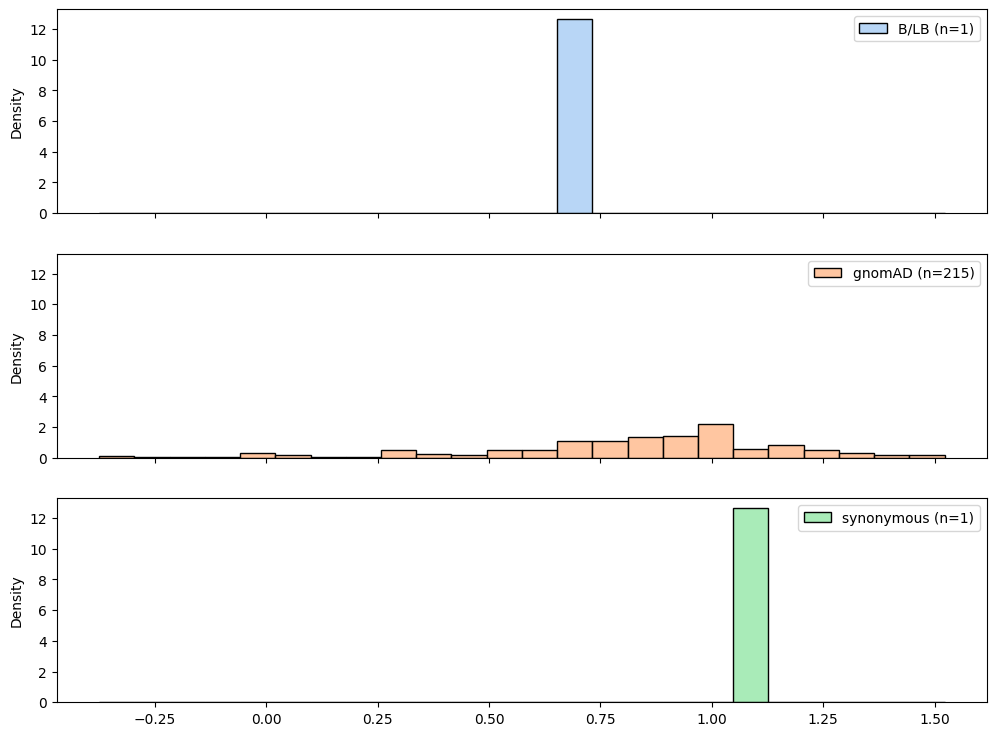

In [18]:
plotting.plot_samples({k : v.score.values for k,v in sample_data.items()})

In [22]:
pd.DataFrame.from_records([*[dict(sample_name='P/LP',score=score) for score in sample_data['P/LP'].score.values],
                            *[dict(sample_name='B/LB',score=score) for score in sample_data['B/LB'].score.values],
                            *[dict(sample_name='gnomAD',score=score) for score in sample_data['gnomAD'].score.values],
                            *[dict(sample_name='synonymous',score=score) for score in sample_data['synonymous'].score.values]]).to_csv(dataset_path / "samples.csv",index=False)

In [23]:
old = joblib.load(dataset_path / "hgvs_pro.pkl")

In [24]:
clinvar_hgvs_pro_summaries[clinvar_hgvs_pro_summaries.index.isin(set(old['p_lp'].values) - set(sample_data['P/LP'].hgvs_pro.values))]

,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max
hgvs_pro,,,,,,,
p.Asn276Ser,1,0,0,0,NM_000314.8(PTEN):c.827A>G (p.Asn276Ser),1,0.62
p.Asp310Gly,1,0,0,0,NM_000314.8(PTEN):c.929A>G (p.Asp310Gly),1,0.96
p.Gly129Val,1,0,0,0,NM_000314.8(PTEN):c.386G>T (p.Gly129Val),1,0.85
p.Leu112Val,1,0,0,0,NM_000314.8(PTEN):c.334C>G (p.Leu112Val),1,0.85
p.Lys342Asn,1,0,0,1,NM_000314.8(PTEN):c.1026G>C (p.Lys342Asn)|NM_0...,2,0.51
p.Met134Ile,2,0,0,1,NM_000314.8(PTEN):c.402G>T (p.Met134Ile)|NM_00...,3,0.00
p.Phe241Leu,1,0,1,0,NM_000314.8(PTEN):c.723T>G (p.Phe241Leu)|NM_00...,2,0.12


In [25]:
clinvar_hgvs_pro_summaries[clinvar_hgvs_pro_summaries.index.isin(set(old['b_lb'].values) - set(sample_data['B/LB'].hgvs_pro.values))]

,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max
hgvs_pro,,,,,,,
p.Ala39=,0,1,1,0,NM_000314.8(PTEN):c.117A>C (p.Ala39=)|NM_00031...,2,0.49
p.Arg142=,0,2,0,1,NM_000314.8(PTEN):c.426G>C (p.Arg142=)|NM_0003...,3,0.35
p.Arg15=,0,1,0,0,NM_000314.8(PTEN):c.45A>G (p.Arg15=),1,0.58
p.Gly143=,0,1,0,1,NM_000314.8(PTEN):c.429C>T (p.Gly143=)|NM_0003...,2,0.01
p.Leu152=,0,2,1,0,NM_000314.8(PTEN):c.456A>G (p.Leu152=)|NM_0003...,3,0.01
p.Pro387=,0,1,1,0,NM_000314.8(PTEN):c.1161A>G (p.Pro387=)|NM_000...,2,0.00
p.Thr366=,0,1,1,0,NM_000314.8(PTEN):c.1098A>C (p.Thr366=)|NM_000...,2,0.00
